### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Dataset information

   - Gender : sex of students -> (Male/female)
   - Race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
   - Parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
   - Lunch : having lunch before test (standard or free/reduced)
   - Test preparation course : complete or not complete before test
   - Math score
   - Reading score
   - Writing score

### Data Checks to perform

   - Check Missing values
   - Check Duplicates
   - Check data type
   - Check the number of unique values of each column
   - Check statistics of data set
   - Check various categories present in the different categorical column

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.
- All standard deviations are also close - between 14.6 and 15.19.
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading also higher = 17

In [10]:
def exploring_data(data):
    for colname, coltype in data.dtypes.iteritems():
        if coltype == object:
            print(f"Categories in ' {colname} variable:",data[colname].unique())
            
exploring_data(df)

Categories in ' gender variable: ['female' 'male']
Categories in ' race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in ' parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in ' lunch variable: ['standard' 'free/reduced']
Categories in ' test_preparation_course variable: ['none' 'completed']


In [11]:
# define numerical & categorical columns

num_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print(f'We have {len(num_features)} numerical features: {num_features}')
print(f'We have {len(categorical_features)} numerical features: {categorical_features}')

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [12]:
df["Total_Score"] = df.math_score + df.reading_score + df.writing_score
df["Average"] = df["Total_Score"] / 3

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full_marks = df[df['math_score'] == 100]['Average'].count()
reading_full_marks = df[df['reading_score'] == 100]['Average'].count()
writing_full_marks = df[df['writing_score'] == 100]['Average'].count()

print(f"Number of Students with full marks in Math: {math_full_marks}")
print(f"Number of Students with full marks in Reading: {reading_full_marks}")
print(f"Number of Students with full marks in Writing: {writing_full_marks}")

Number of Students with full marks in Math: 7
Number of Students with full marks in Reading: 17
Number of Students with full marks in Writing: 14


In [15]:
math_less_20 = df[df['math_score'] <= 20]['Average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()

print(f"Number of Students with less than 20 Marks in Math: {math_less_20}")
print(f"Number of Students with less than 20 Marks in Reading: {reading_less_20}")
print(f"Number of Students with less than 20 Marks in Writing: {writing_less_20}")

Number of Students with less than 20 Marks in Math: 4
Number of Students with less than 20 Marks in Reading: 1
Number of Students with less than 20 Marks in Writing: 3


### Insight

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### Visualization

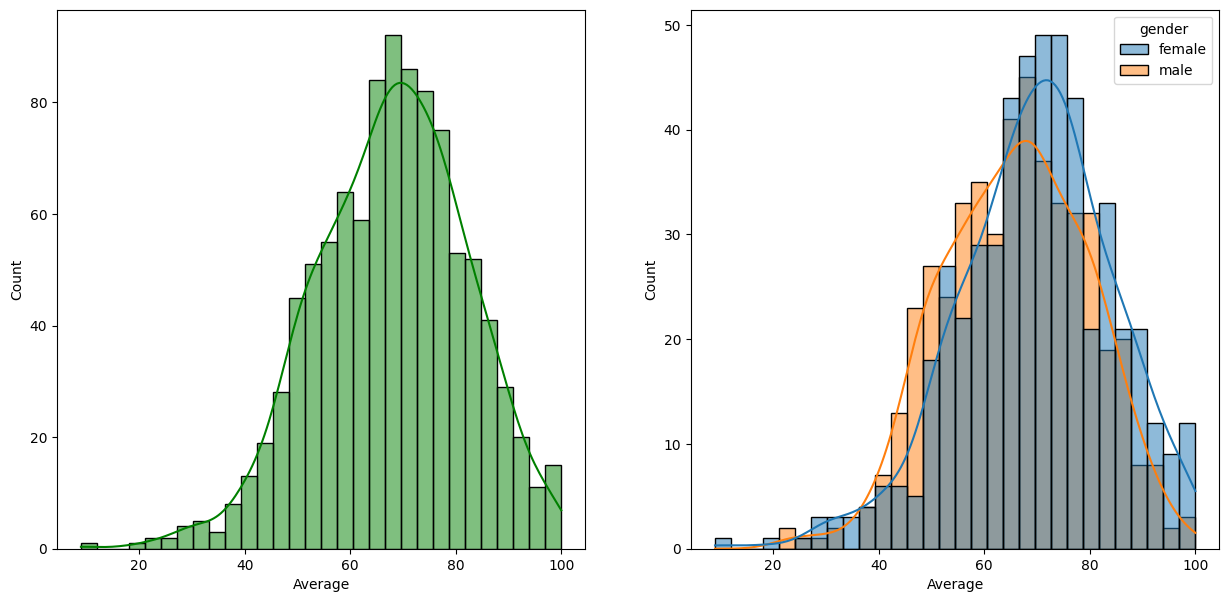

In [16]:
fig, ax = plt.subplots(1 , 2, figsize=(15, 7))

plt.subplot(121)
sn.histplot(df, x="Average", bins=30, kde=True, color='g')

plt.subplot(122)
sn.histplot(df, x="Average", bins=30, kde=True, color='g', hue='gender')

plt.show()

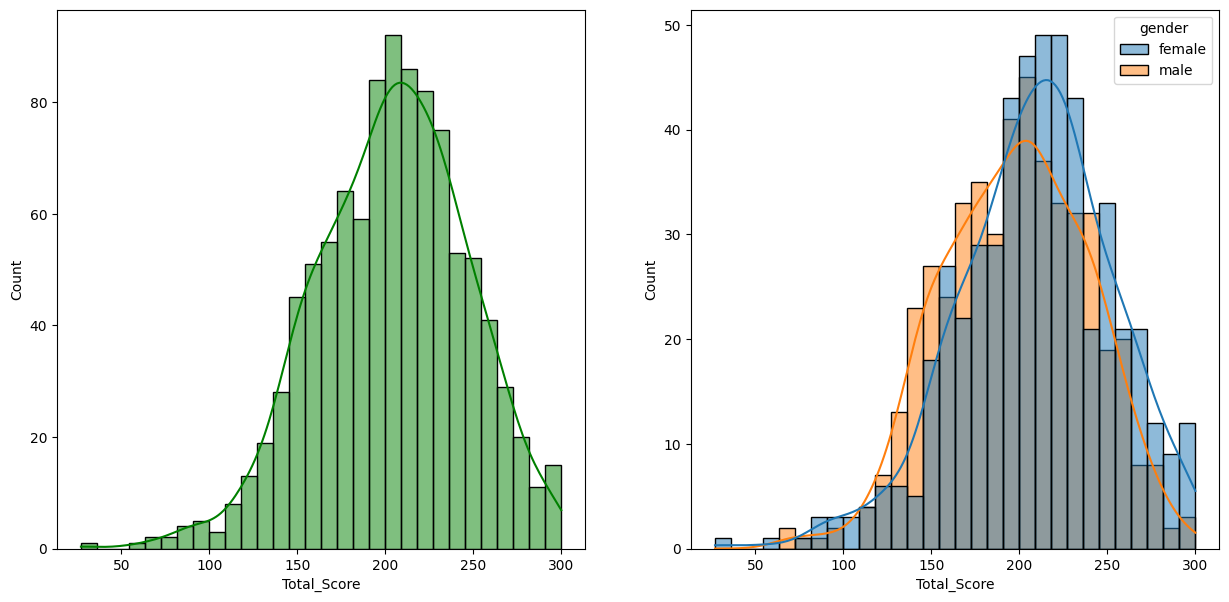

In [17]:
fig, ax = plt.subplots(1 , 2, figsize=(15, 7))

plt.subplot(121)
sn.histplot(df, x="Total_Score", bins=30, kde=True, color='g')

plt.subplot(122)
sn.histplot(df, x="Total_Score", bins=30, kde=True, hue='gender')

plt.show()

### Insight

- Female students tend to perform well then male students.

<Axes: xlabel='Average', ylabel='Count'>

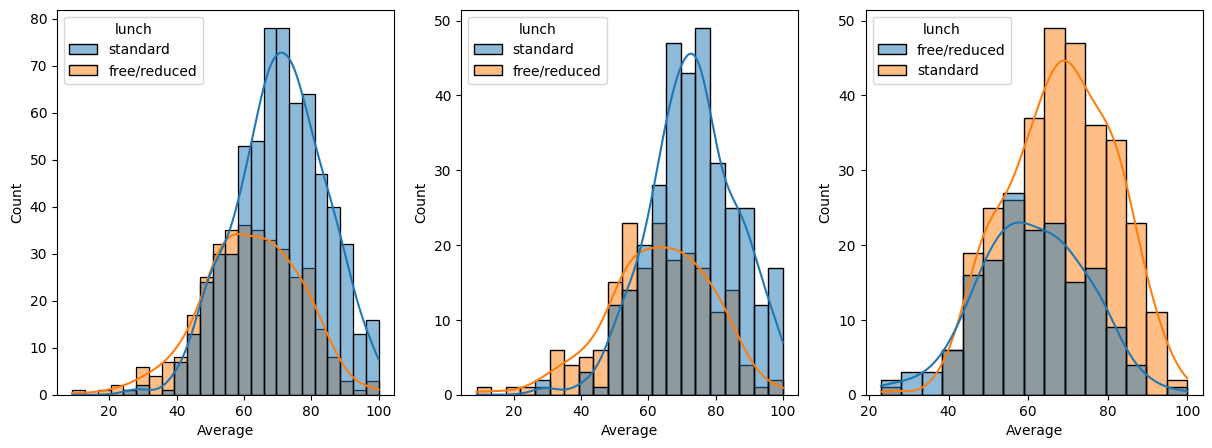

In [18]:
fig, ax = plt.subplots(1, 3, figsize= (20, 5))

plt.subplot(141)
sn.histplot(data=df, x='Average', kde=True, hue='lunch')

plt.subplot(142)
sn.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch')

plt.subplot(143)
sn.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch')

### Insight

- Standard lunch helps perform well in exams
- Stanard lunch helps perform well in exams be it a male or a female 

<Axes: xlabel='Average', ylabel='Count'>

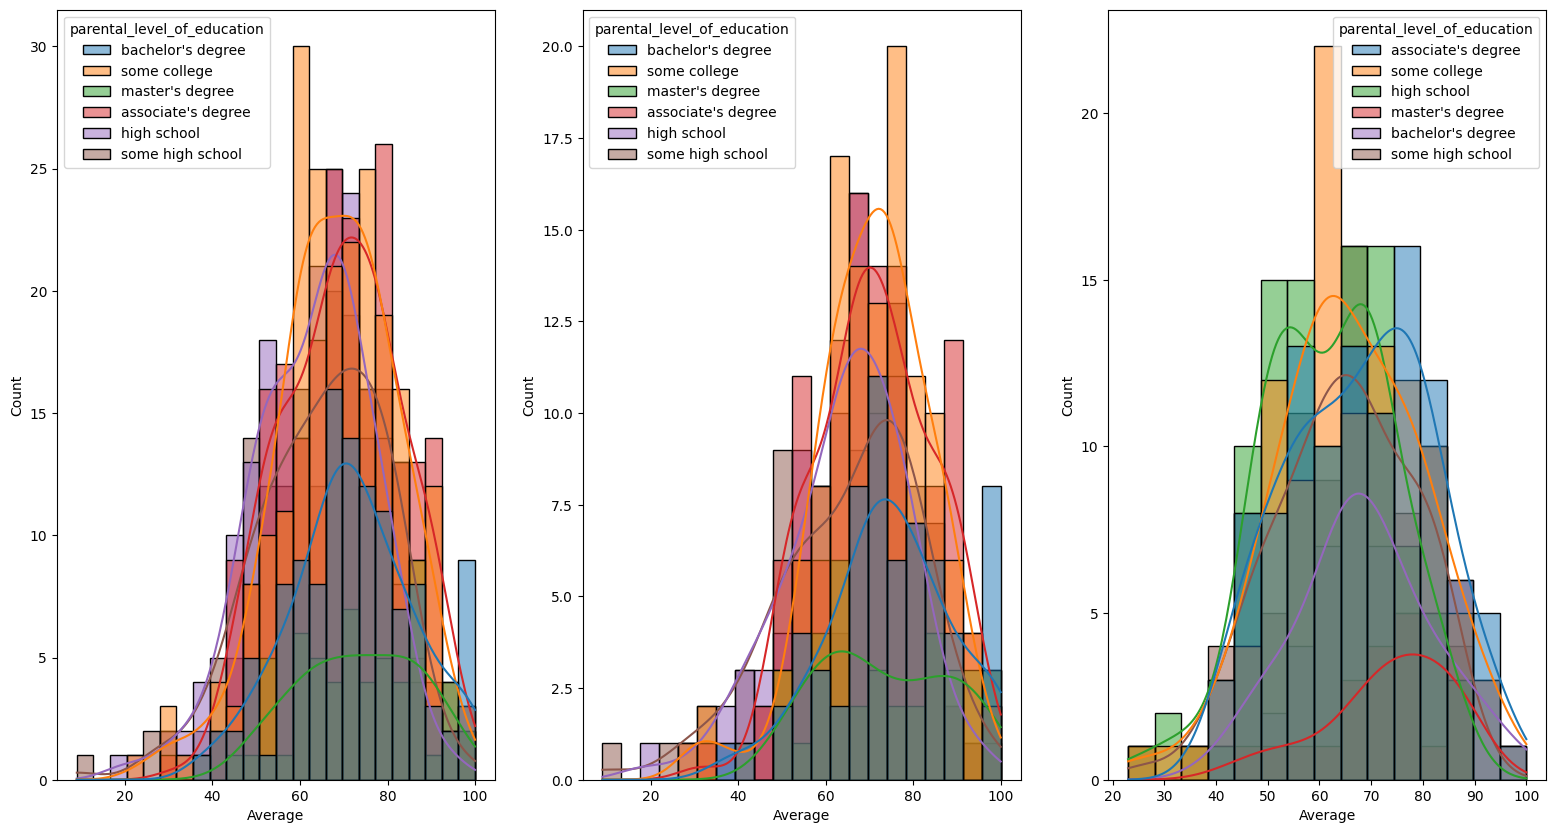

In [19]:
fig, ax = plt.subplots(1, 3, figsize= (26, 10))

plt.subplot(141)
sn.histplot(data=df, x='Average',kde=True, hue='parental_level_of_education')

plt.subplot(142)
sn.histplot(data=df[df.gender == 'female'], x='Average',kde=True, hue='parental_level_of_education')

plt.subplot(143)
sn.histplot(data=df[df.gender == 'male'], x='Average',kde=True, hue='parental_level_of_education')

### Insight

- In general parent's education don't help student perform well in exam.
- 2nd plot we can see there is no effect of parent's education on female students.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

<Axes: xlabel='Average', ylabel='Count'>

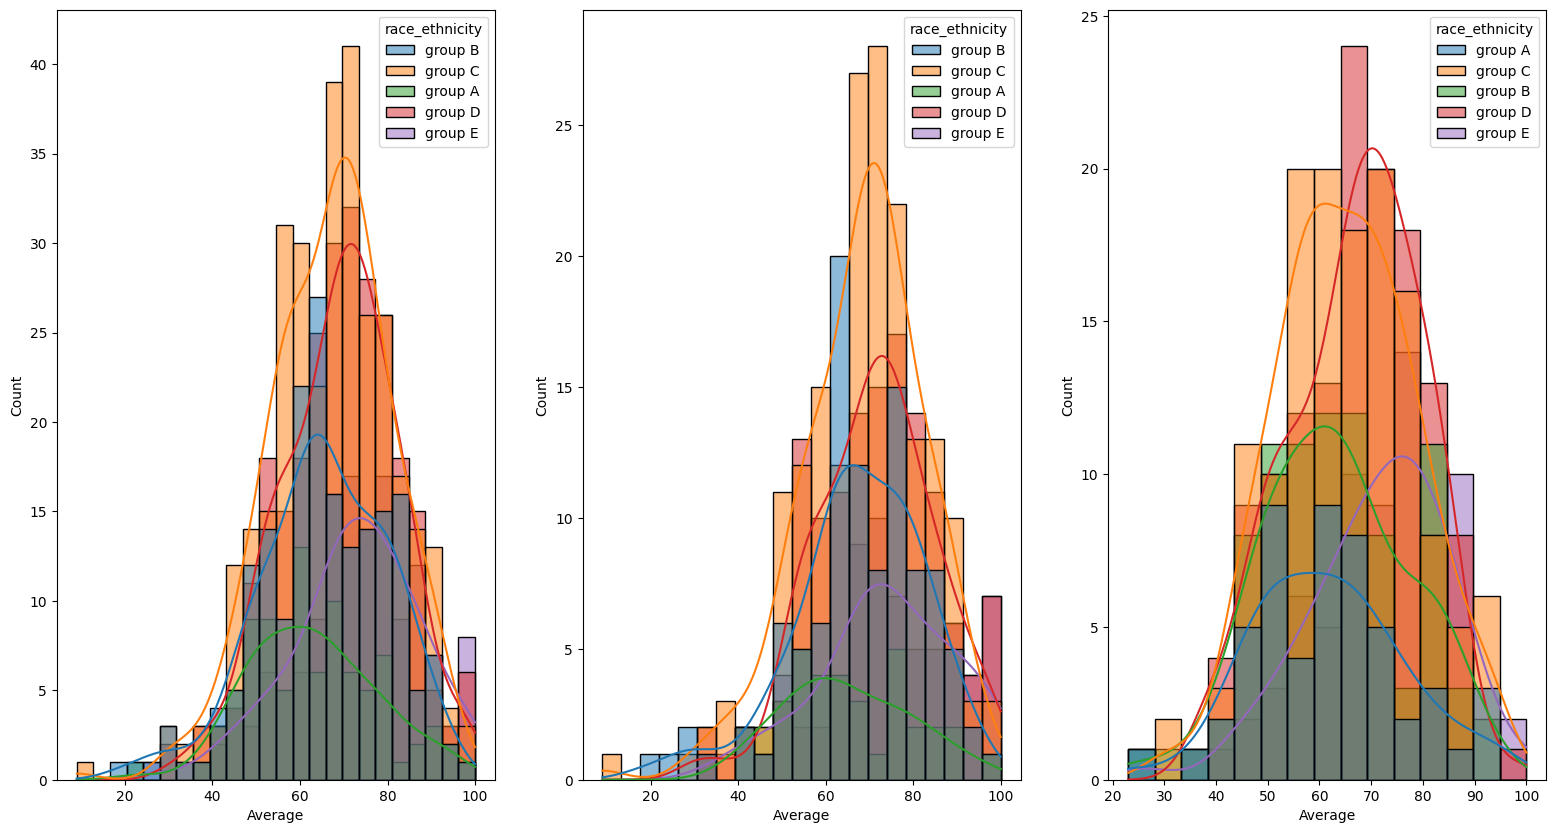

In [20]:
fig, ax = plt.subplots(1, 3, figsize= (26, 10))

plt.subplot(141)
sn.histplot(data=df, x='Average',kde=True, hue='race_ethnicity')

plt.subplot(142)
sn.histplot(data=df[df.gender == 'female'], x='Average',kde=True, hue='race_ethnicity')

plt.subplot(143)
sn.histplot(data=df[df.gender == 'male'], x='Average',kde=True, hue='race_ethnicity')

### Insight

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

### Maximumum score of students in all three subjects

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

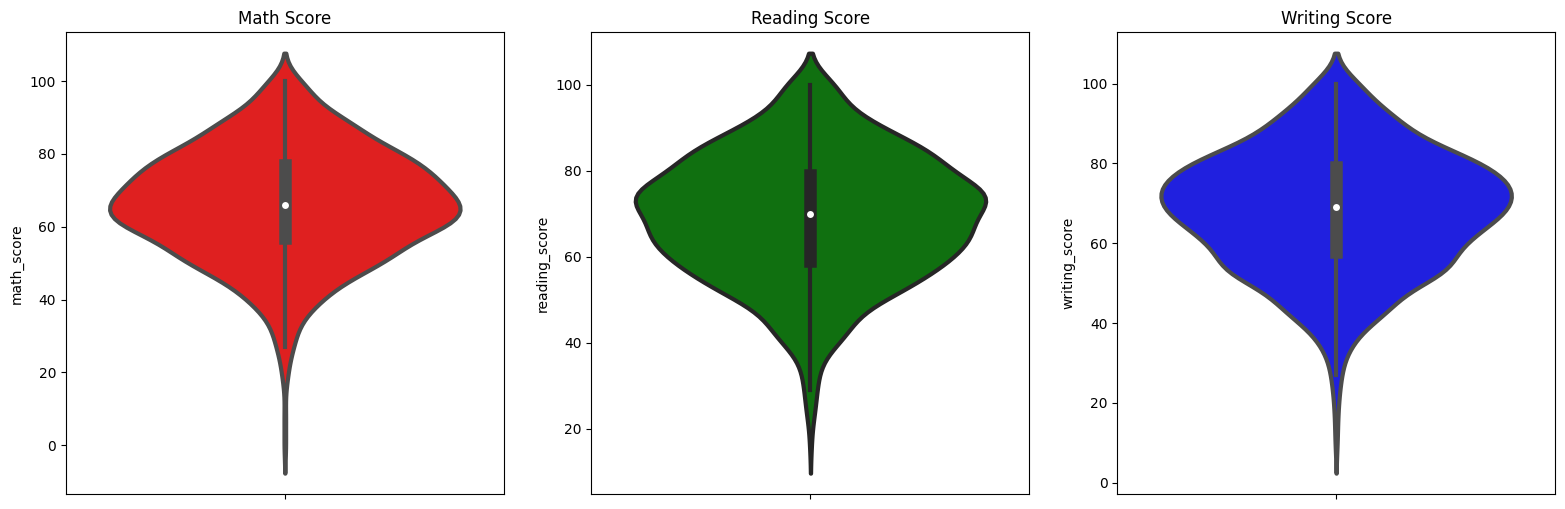

In [21]:
fig , ax = plt.subplots(1, 3, figsize=(26, 6))

plt.subplot(141)
plt.title("Math Score")
sn.violinplot(data=df, y='math_score', color='red', linewidth=3)

plt.subplot(142)
plt.title("Reading Score")
sn.violinplot(data=df, y='reading_score', color='green', linewidth=3)

plt.subplot(143)
plt.title("Writing Score")
sn.violinplot(data=df, y='writing_score', color='blue', linewidth=3)

### Insight

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

### Multivariate analysis using pieplot

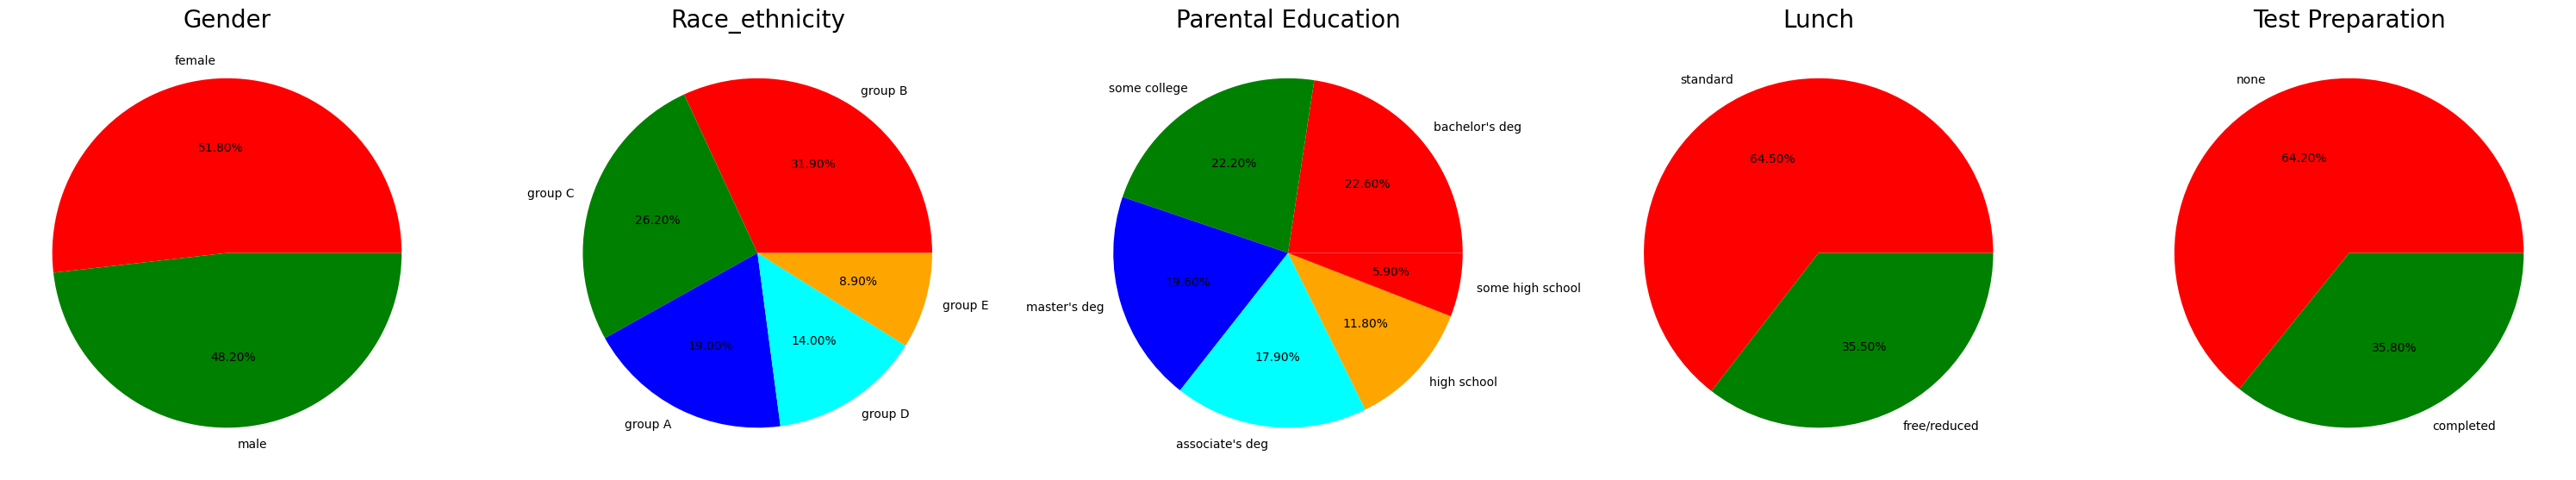

In [22]:
fig, ax = plt.subplots(1, 5, figsize=(30, 12))

plt.subplot(151)
size = df.gender.value_counts()
labels = 'female', 'male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%0.2f%%')
plt.title("Gender", fontsize= 20)

plt.subplot(152)
size = df.race_ethnicity.value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors=color, labels=labels, autopct='%0.2f%%')
plt.title("Race_ethnicity", fontsize=20)

plt.subplot(153)
size = df.parental_level_of_education.value_counts()
labels = "bachelor's deg", 'some college', "master's deg", "associate's deg", 'high school', 'some high school'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors=color, labels=labels, autopct='%0.2f%%')
plt.title("Parental Education", fontsize=20)

plt.subplot(154)
size = df.lunch.value_counts()
labels = 'standard', 'free/reduced'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%0.2f%%')
plt.title("Lunch", fontsize=20)

plt.subplot(155)
size = df.test_preparation_course.value_counts()
labels = 'none', 'completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%0.2f%%')
plt.title("Test Preparation", fontsize=20)


plt.tight_layout()
plt.grid()

plt.show()


### Insight

- Numbers of Male & Female students is almost equal
- Number students are greatest in Group B
- Number of students whose parental education is "bachelor's Degree" is greater followed closely by "Associate's Degree"
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater

### Feature Wise Visualization

### 1). Gender Column
- How is distribution of Gender?
- Is Gender has any impact on student's performance?

### Univariate Analysis (How is distribution of Gender?)

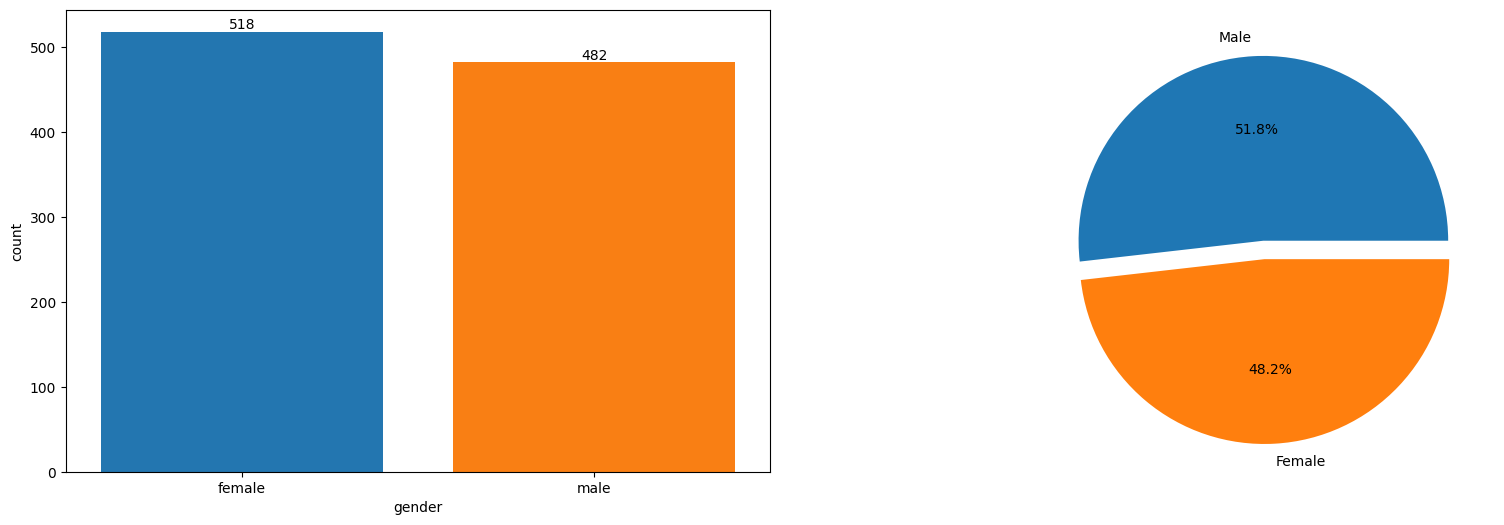

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sn.countplot(x=df.gender, data=df, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)
    
plt.pie(x=df.gender.value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%')
plt.show()

### Insight

- Gender has balanced data with Female students are 518(48%) & Male students are 482(52%)

### Bivariate Analysis (Is Gender has any impact on student's performance?)

In [24]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total_Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


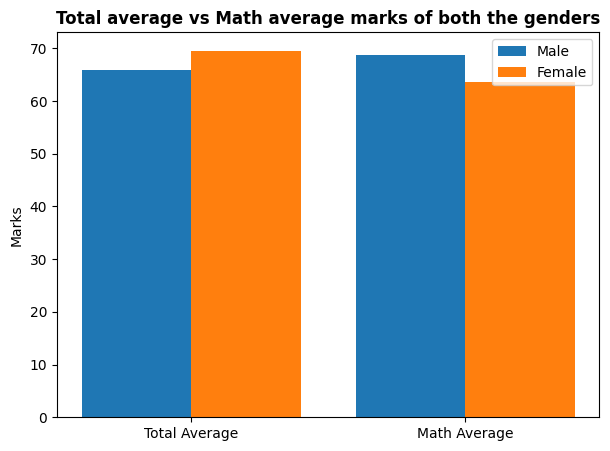

In [25]:
plt.figure(figsize=(7, 5))

X = ['Total Average', 'Math Average']

Female_score = [gender_group['Average'][0], gender_group['math_score'][0]]
Male_score = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Male_score, 0.4, label='Male')
plt.bar(X_axis + 0.2, Female_score, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insight

- On an average females have a better overall score than male
- Whereas males have scored higher in Maths.

### 2). Race/Ethnicity
- How is group wise distribution?
- Is Race/Ethnocoty has any impact on student's performance?

### Univariate Analysis (How is group wise distribution?)

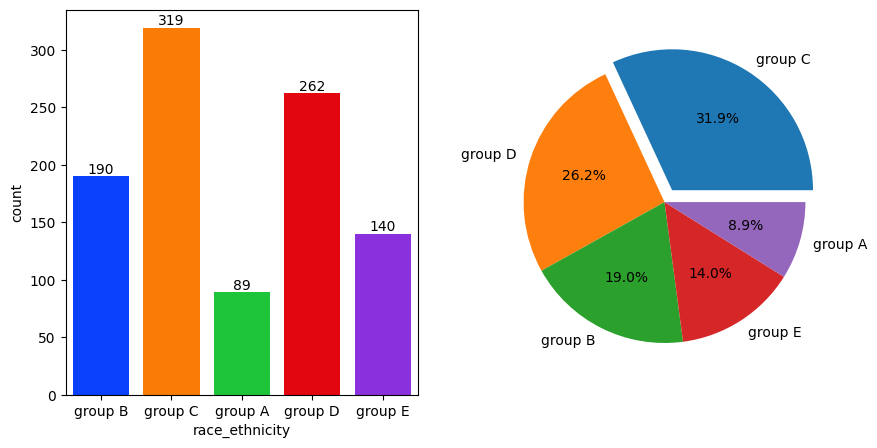

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sn.countplot(x=df.race_ethnicity, data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)
    
plt.pie(x=df.race_ethnicity.value_counts(), labels=df.race_ethnicity.value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%')
plt.show()

### Insight

- Most of the students belonging from Group C & Group D.
- Lowest number of students belong to Group A.

### Bivariate Analysis (Is Race/Ethnocoty has any impact on student's performance?)

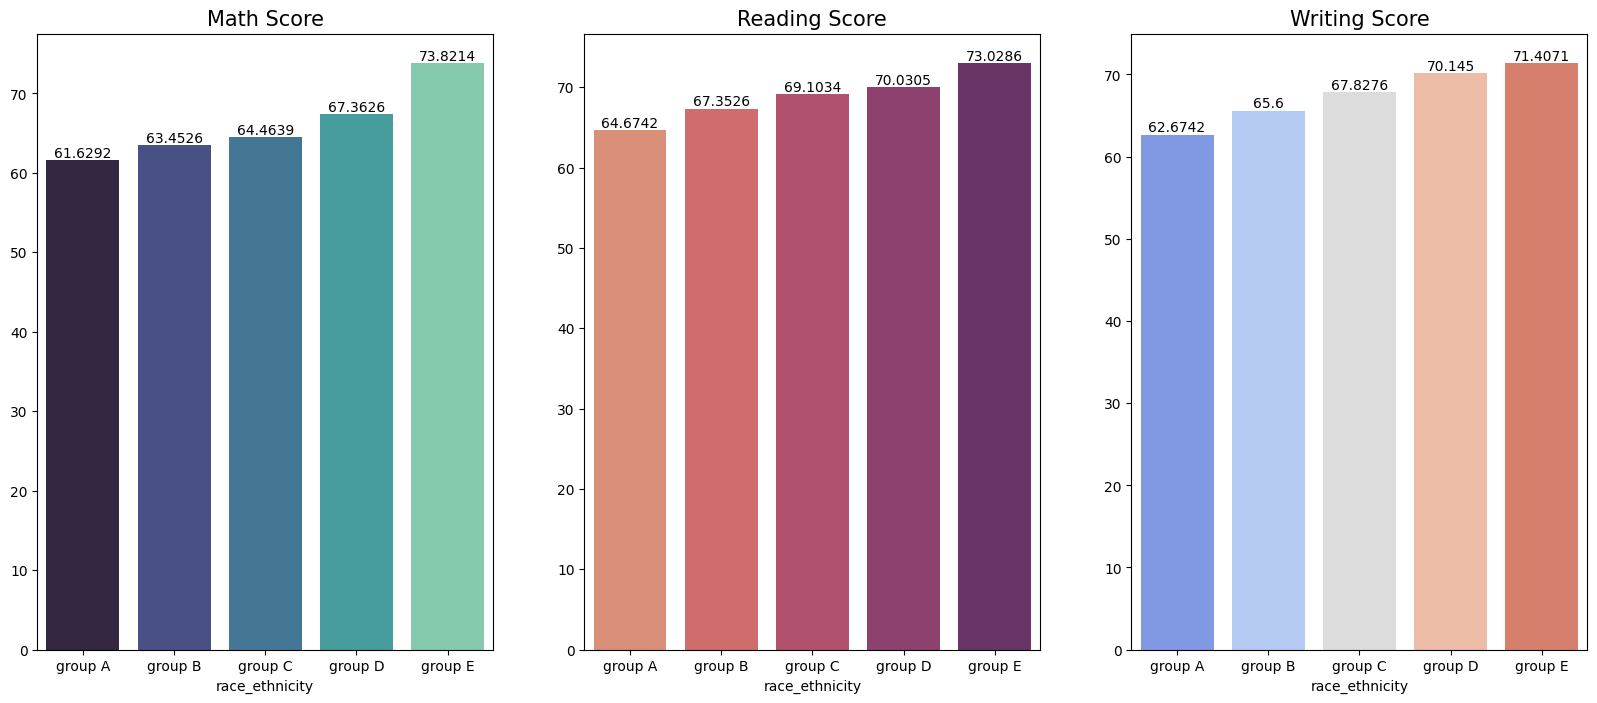

In [27]:
group_data_2 = df.groupby('race_ethnicity')

fig, ax = plt.subplots(1,3, figsize=(20,8))
sn.barplot(x=group_data_2['math_score'].mean().index, y=group_data_2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', size=15)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

sn.barplot(x=group_data_2['reading_score'].mean().index, y=group_data_2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', size=15)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)
    
sn.barplot(x=group_data_2['writing_score'].mean().index, y=group_data_2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', size=15)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)

### Insight

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower socioeconomic status have a lower average in all course subjects.

### 3). Parental Level of Education
- What is educational background of student's parent?
- Is parental education has any impact on student's performance?

### Univariate Analysis (What is educational background of student's parent?)

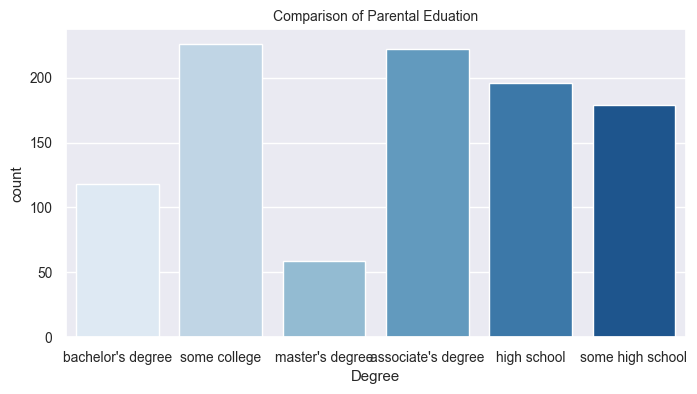

In [28]:
plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
sn.set(font_scale=0.9)
sn.countplot(df['parental_level_of_education'], palette='Blues')
plt.title("Comparison of Parental Eduation", fontweight=10, fontsize=10)
plt.xlabel('Degree')
plt.show()

### Insight

- Largest number of parents are from some college.

### Bivariate Analysis (Is parental education has any impact on student's performance?)

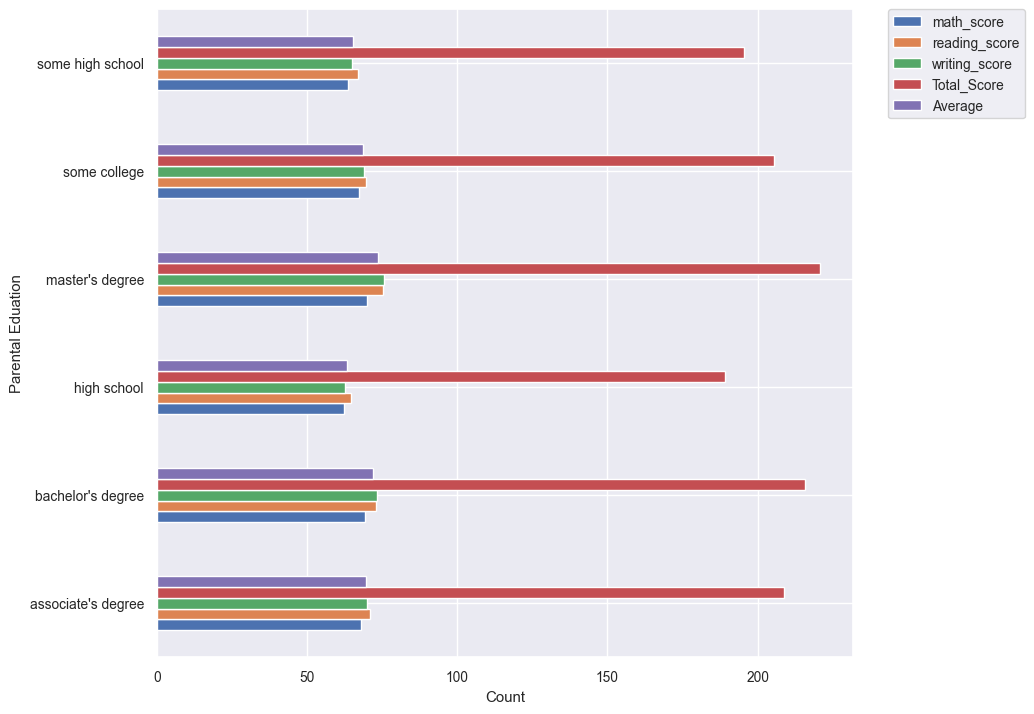

In [29]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(8,8))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xlabel('Count')
plt.ylabel('Parental Eduation')
plt.show()

### Insight

- The score of student whose parents possess master and bachelor level education are higher than others.

### 4). Lunch
- Which type of lunch is most common among students?
- What is the effect of lunch type on test results?

### Univariate Analysis (Which type of lunch is most common among students?)

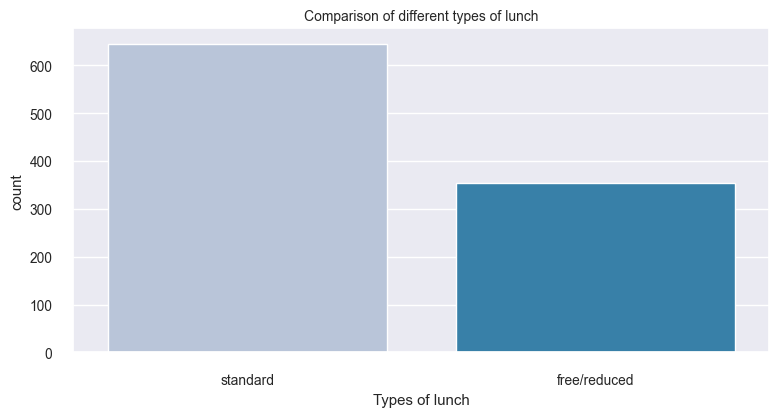

In [30]:
plt.figure(figsize=(8, 4))
plt.style.use('seaborn-talk')
sn.set(font_scale=0.9)
sn.countplot(df['lunch'], palette='PuBu')
plt.title("Comparison of different types of lunch", fontweight=10, fontsize=10)
plt.xlabel('Types of lunch')
plt.show()

### Insight

- Students being served Standard lunch was more than free lunch

### Bivariate Analysis (What is the effect of lunch type on test results?)

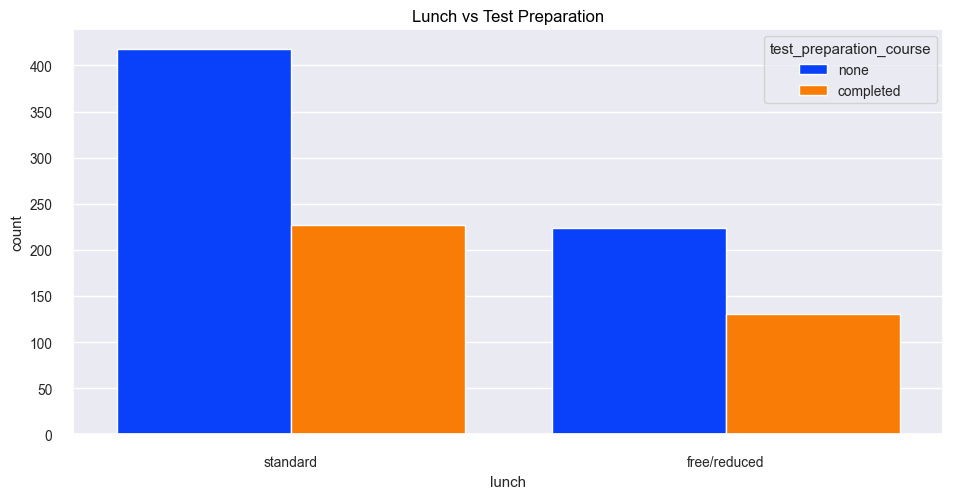

In [63]:
plt.figure(figsize=(10,5))

sn.countplot(data=df, x='lunch', hue='test_preparation_course', palette='bright',saturation=0.95)
plt.title('Lunch vs Test Preparation', color='black', size=12)

plt.show()

### Insight

- Students how get Standard Lunch tend to perform better than students who got free/reduced lunch.

### 5). Test Preparation Course
- How many Students have completed the test preparation or not?
- Is Test presentation course any impact on students performance?

### Univariate Analysis (How many Students have completed the test preparation or not?)

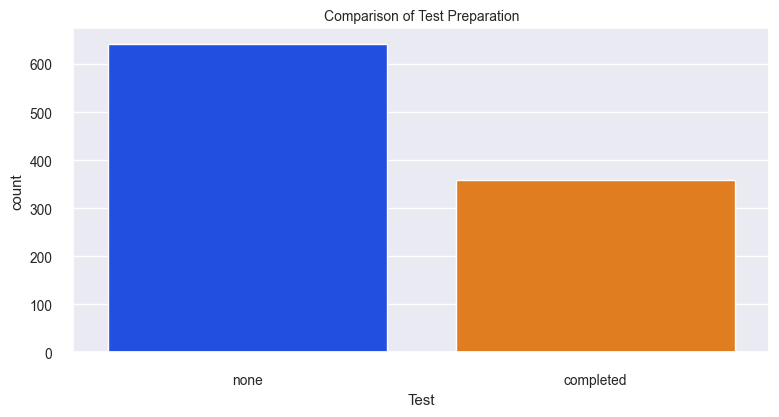

In [76]:
plt.figure(figsize=(8, 4))
plt.style.use('seaborn-talk')
sn.set(font_scale=0.9)
sn.countplot(df['test_preparation_course'],palette='bright')
plt.title("Comparison of Test Preparation", fontweight=10, fontsize=10)
plt.xlabel('Test')
plt.show()

### Insight

- Largest number of students did not complete the test.

### Bivariate Analysis (Is Test presentation course any impact on students performance?)

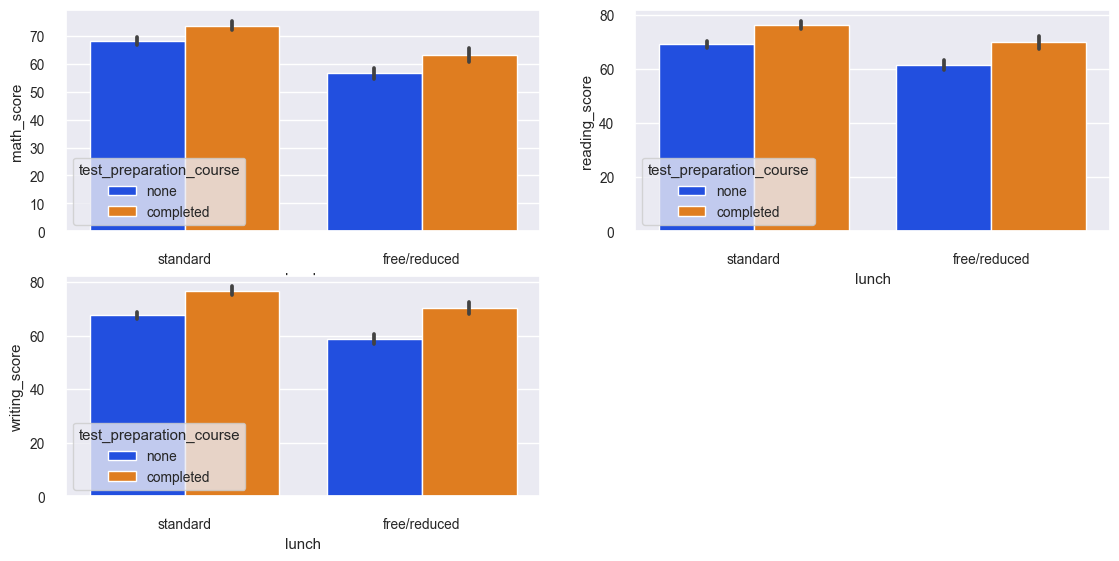

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(2 ,2 ,1)
sn.barplot(data=df, x='lunch', y='math_score', hue='test_preparation_course', palette='bright')

plt.subplot(2 ,2 ,2)
sn.barplot(data=df, x='lunch', y='reading_score', hue='test_preparation_course',palette='bright')

plt.subplot(2 ,2 ,3)
sn.barplot(data=df, x='lunch', y='writing_score', hue='test_preparation_course',palette='bright')
plt.show()

### Insight

- Students who have completed the Test Preparation Course have score highter in all three categories than those who haven't taken the ccourse

### Checking Outliers

<Axes: ylabel='Average'>

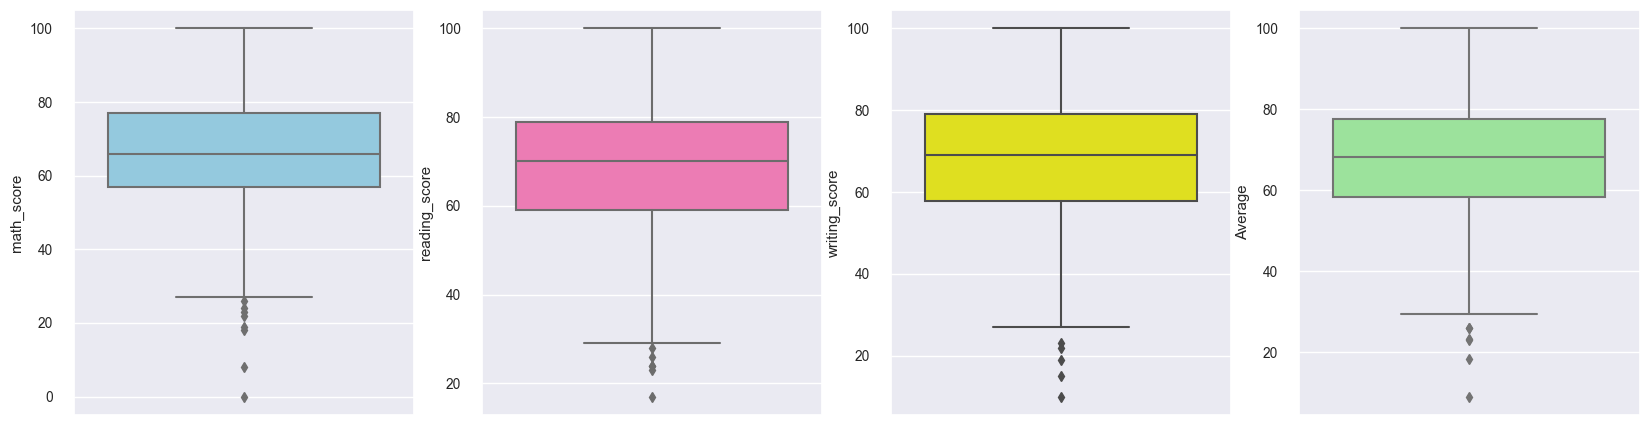

In [99]:
plt.subplots(1,4, figsize=(18, 5))

plt.subplot(141)
sn.boxplot(data=df, y='math_score', color='skyblue')

plt.subplot(142)
sn.boxplot(data=df, y='reading_score', color='hotpink')

plt.subplot(143)
sn.boxplot(data=df, y='writing_score', color='yellow')

plt.subplot(144)
sn.boxplot(data=df, y='Average', color='lightgreen')

### Multivariate Analysis using Pairplot

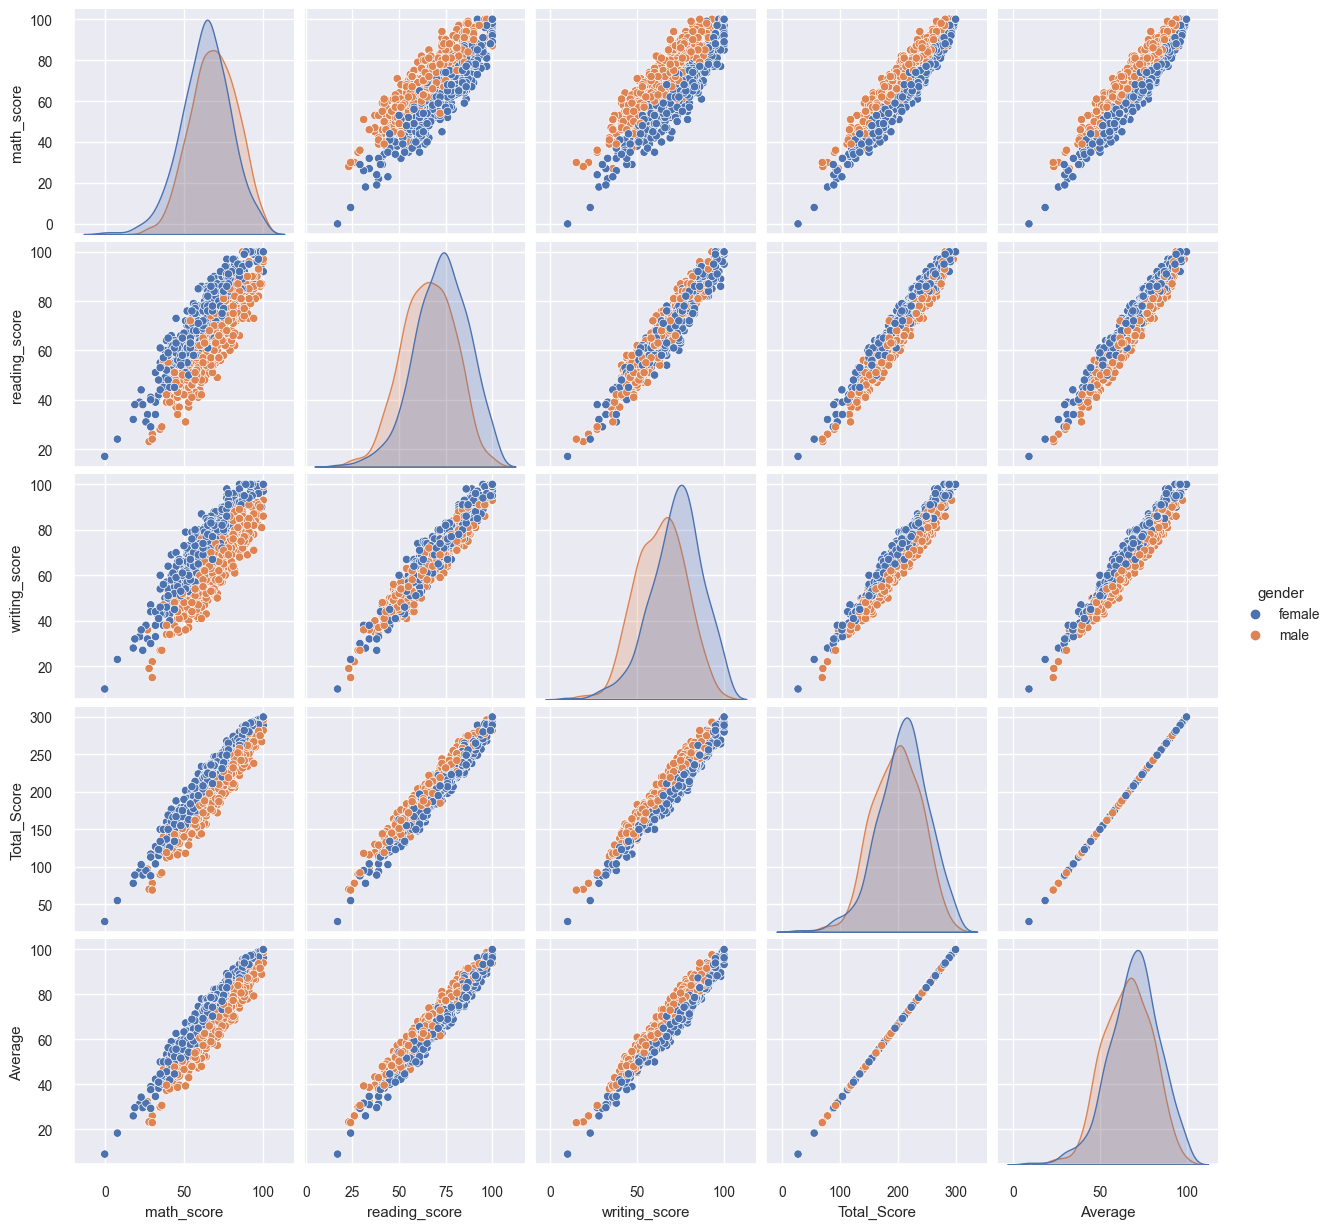

In [100]:
sn.pairplot(df, hue='gender')
plt.show()

### Insight

- From the above plot it is clear that all the scores increase linearly with each other

## Conclusion

- Students performance is related with Lunch, Race/Ethnicity, Parental Level Education.
- Females lead in pass percentage and also are top scores
- Students Performance is not much related with test preparation course
- Finishing preparation course is beneficial 